In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data in dataframe
df = pd.read_excel("Data_Dictionary.xlsx")

In [5]:
df.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [7]:
loandf = pd.read_csv("loan.csv")

C:\Users\amit.kumar\AppData\Local\Temp\ipykernel_19688\883669160.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loandf = pd.read_csv("loan.csv")


In [9]:
# Read the CSV file with low_memory set to False
loandf = pd.read_csv("loan.csv", low_memory=False)

In [15]:
loandf.shape

(39717, 111)

In [13]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [23]:
def get_nan_columns_sorted(df):
    # Count NaN values for each column
    nan_count = df.isnull().sum()
    # Filter columns where NaN count is greater than 0
    nan_columns_sorted = nan_count[nan_count > 0].sort_values(ascending=False)
    return nan_columns_sorted

In [27]:
get_nan_columns_sorted(loandf_cleaned)

bc_open_to_buy                39717
acc_open_past_24mths          39717
bc_util                       39717
mo_sin_old_il_acct            39717
mo_sin_old_rev_tl_op          39717
                              ...  
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
Length: 68, dtype: int64

In [29]:
pd.set_option('display.max_rows', None)

In [31]:
# Drop columns where all values are NaN
loandf_cleaned = loandf.dropna(axis=1, how='all')

In [33]:
loandf_cleaned.shape

(39717, 57)

In [53]:
# Get columns where the number of unique values is 1
single_value_cols = loandf_cleaned.columns[loandf_cleaned.nunique() == 1].tolist()

In [55]:
single_value_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [65]:
# Drop these columns from the DataFrame as these will not contribute to analysis
loandf_cleaned = loandf_cleaned.drop(columns=single_value_cols)

In [67]:
loandf_cleaned.shape

(39717, 48)

In [81]:
get_nan_columns_sorted(loandf_cleaned).head(2)

mths_since_last_record    36931
mths_since_last_delinq    25682
dtype: int64

In [71]:
loandf_cleaned[["next_pymnt_d","loan_status"]].head()

,next_pymnt_d,loan_status
0,NaN,Fully Paid
1,NaN,Charged Off
2,NaN,Fully Paid
3,NaN,Fully Paid
4,Jun-16,Current


In [73]:
# Leaving NaN as is for next_paymnt_d as it actually means "No Payment due", cocedering the loan_status column
# Find rows where next_pymnt_d is NaN and loan_status is 'Current'
missing_next_pymnt_rows = loandf_cleaned[(loandf_cleaned['next_pymnt_d'].isnull()) & (loandf_cleaned['loan_status'] == 'Current')]
missing_next_pymnt_rows.shape

(0, 48)

In [75]:
# Find rows where next_pymnt_d is not NaN and loan_status is not 'Current'
non_current_with_payment_due = loandf_cleaned[(loandf_cleaned['next_pymnt_d'].notnull()) & (loandf_cleaned['loan_status'] != 'Current')]
non_current_with_payment_due.shape

(0, 48)

In [77]:
# It is clear that next_pymnt_d is realted to loan_status. 
# Data value is only for loan_status = Current
# Hence it is safe to drop the column as the information is there in loan status column
loandf_cleaned = loandf_cleaned.drop(columns=["next_pymnt_d"])

In [83]:
get_nan_columns_sorted(loandf_cleaned).head(2)

mths_since_last_record    36931
mths_since_last_delinq    25682
dtype: int64

In [85]:
#handling mths_since_last_record fiield
loandf_cleaned[["mths_since_last_record","loan_status"]].head()

,mths_since_last_record,loan_status
0,NaN,Fully Paid
1,NaN,Charged Off
2,NaN,Fully Paid
3,NaN,Fully Paid
4,NaN,Current


In [87]:
# view full test in dis=ctionary
pd.set_option('display.max_colwidth', None)

In [89]:
loandf_cleaned.mths_since_last_record.value_counts()

mths_since_last_record
0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
94.0      55
108.0     55
93.0      54
87.0      54
100.0     53
106.0     53
88.0      53
110.0     53
109.0     52
96.0      51
86.0      51
97.0      51
114.0     51
99.0      50
101.0     50
90.0      49
103.0     49
107.0     48
85.0      47
117.0     47
91.0      44
92.0      44
102.0     43
98.0      42
116.0     41
95.0      40
105.0     40
112.0     39
115.0     37
118.0     36
63.0      15
76.0      15
61.0      14
58.0      13
80.0      12
67.0      11
81.0      11
69.0      11
55.0      11
119.0     10
54.0      10
77.0      10
73.0       9
53.0       9
64.0       9
72.0       9
50.0       9
82.0       8
21.0       8
70.0       8
78.0       7
49.0       7
57.0       7
43.0       7
79.0       7
44.0       7
38.0       7
26.0       6
40.0       6
41.0       6
29.0       6
65.0       6
33.0       6
23.0       6
75.0       6
42.0       6
60.0       6
74.0       6
66.0       6
62.0       6
45

In [91]:
# Create a new column 'has_public_record' where 'mths_since_last_record' is NaN => 'No', else 'Yes'
loandf_cleaned.loc[:, 'has_public_record'] = np.where(loandf_cleaned['mths_since_last_record'].isnull(), 'No', 'Yes')

In [93]:
loandf_cleaned.has_public_record.value_counts()

has_public_record
No     36931
Yes     2786
Name: count, dtype: int64

In [95]:
# Dropping the mths_since_last_record column
loandf_cleaned = loandf_cleaned.drop(columns=["mths_since_last_record"])

In [97]:
#handling mths_since_last_delinq column
# mths_since_last_delinq has 64.6% null values. But NaN value maeans the accounts have never been delinquent
# Create a new column has_delinquency with Yes and No values
loandf_cleaned.loc[:,'has_delinquency'] = np.where(loandf_cleaned['mths_since_last_delinq'].isnull(), 'No', 'Yes')

In [99]:
loandf_cleaned.has_delinquency.value_counts()

has_delinquency
No     25682
Yes    14035
Name: count, dtype: int64

In [101]:
# Dropping the mths_since_last_record column
loandf_cleaned = loandf_cleaned.drop(columns=["mths_since_last_delinq"])

In [103]:
loandf_cleaned.desc.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [105]:
#handling desc column. It is difficult to make any sense of text at this point.
#create a new column has_desc
loandf_cleaned.loc[:,'has_desc'] = np.where(loandf_cleaned['desc'].isnull(), 'No', 'Yes')

In [107]:
loandf_cleaned.has_desc.value_counts()

has_desc
Yes    26775
No     12942
Name: count, dtype: int64

In [109]:
#dropping desc column
loandf_cleaned = loandf_cleaned.drop(columns=['desc'])

In [111]:
loandf_cleaned.emp_title.head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [113]:
# handling emp_title column
# about 6% is null. This can be either rhe borrower was unemployed or simply did not provide details
# Setting the null values with "Unknown"
loandf_cleaned.loc[:,'emp_title'] = loandf_cleaned['emp_title'].fillna('Unknown')

In [115]:
loandf_cleaned.emp_title.value_counts()

emp_title
Unknown                                                                           2459
US Army                                                                            134
Bank of America                                                                    109
IBM                                                                                 66
AT&T                                                                                59
Kaiser Permanente                                                                   56
USAF                                                                                54
Wells Fargo                                                                         54
UPS                                                                                 53
US Air Force                                                                        52
Walmart                                                                             45
Lockheed Martin                  

In [117]:
loandf_cleaned.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [119]:
#handle emp_length
# this indicates job stability. Missing values may indicate borrower being unemployed or simple not provided.
# hence replacing nulls with Unknown seems a good approach
loandf_cleaned.loc[:,'emp_length'] = loandf_cleaned['emp_length'].fillna('Unknown')

In [121]:
loandf_cleaned.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Unknown      1075
Name: count, dtype: int64

In [123]:
loandf_cleaned.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [127]:
# Handling pub_rec_bankruptcies
# This column has 1.75 missing values
# It is very likely that missing values is because the borrowers have no bankrupcies as any bankrupcies is likely to be discovered by loan provider
# Hence fillling with 0.0 (which is also median) seems a reasonable approach here
loandf_cleaned.loc[:, 'pub_rec_bankruptcies'] = loandf_cleaned['pub_rec_bankruptcies'].fillna(0.0)

In [129]:
loandf_cleaned.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [131]:
# Handling last_pymnt_d
# Relative small .18% is missing
# No clear reason can be attributed
# In order to avoid any bias, dropping the rows seems reasonable
loandf_cleaned = loandf_cleaned.dropna(subset=['last_pymnt_d'])

In [133]:
loandf_cleaned.shape

(39646, 47)

In [139]:
loandf_cleaned.revol_util.value_counts()

revol_util
0%        975
0.20%      62
63%        62
0.10%      58
40.70%     58
66.70%     58
66.60%     57
61%        57
46.40%     57
31.20%     57
65.90%     56
70.40%     56
57.40%     55
37.60%     55
64.80%     55
49.80%     55
25.50%     55
48.90%     54
89.50%     54
78.70%     54
46.60%     54
51.60%     54
32%        54
68.60%     54
75.50%     54
27.20%     54
64.60%     54
76.60%     54
33.70%     53
68.70%     53
41%        53
54.30%     53
62.80%     53
35.30%     53
70.80%     53
47.80%     53
34.40%     53
55.80%     53
45.60%     53
48.20%     53
51.10%     53
72.10%     52
53.90%     52
55.50%     52
36.50%     52
70.10%     52
51.50%     52
66.90%     52
74.90%     52
48%        52
70.30%     52
41.60%     52
88%        51
29.10%     51
54.10%     51
58.70%     51
43.40%     51
54.60%     51
55.10%     51
35.70%     51
89.90%     51
30.90%     51
41.40%     51
40.20%     51
45.90%     51
66.10%     51
47.40%     50
52.30%     50
53.70%     50
23.70%     50
73.20%   

In [141]:
# Handling revol_util
# Relativelly low .13 % null values
# As there is not clear memaning of null values, it seems best to drop the rows with null values
loandf_cleaned = loandf_cleaned.dropna(subset=['revol_util'])

In [147]:
# Remove '%' and convert 'revol_util' to float
loandf_cleaned.loc[:, 'revol_util'] = loandf_cleaned['revol_util'].str.rstrip('%').astype('float') / 100

In [151]:
loandf_cleaned.shape

(39600, 47)

In [155]:
get_nan_columns_sorted(loandf_cleaned).head(2)

title                 11
last_credit_pull_d     2
dtype: int64

In [157]:
# Handling title
# title has only 11 null values
# Introducing a new category "Unknown" seeps appropriate
loandf_cleaned.loc[:, 'title'] = loandf_cleaned['title'].fillna('Unknown')

In [159]:
# Handling last_credit_pull_d
# Since there are only 2 null values, it is safe to drop there rows without any impact on EDA
loandf_cleaned = loandf_cleaned.dropna(subset=['last_credit_pull_d'])

In [161]:
loandf_cleaned.shape

(39598, 47)

In [163]:
get_nan_columns_sorted(loandf_cleaned).head(2)

Series([], dtype: int64)

In [173]:
# url = https://lendingclub.com/browse/loanDetail.action?loan_id=1077501 is also does not seem to have any contribution to EDA
loandf_cleaned = loandf_cleaned.drop(columns=["url"])

In [175]:
loandf_cleaned.shape

(39598, 46)

In [185]:
#dropping id and member_id colums as there will not be analysed
loandf_cleaned = loandf_cleaned.drop(columns=["id", "member_id"])

In [187]:
loandf_cleaned.shape

(39598, 44)

In [189]:
num_cols = []
cat_cols = []
extra_cols = []

# Loop through each column and classify based on unique values
for col in loandf_cleaned.columns:
    unique_values = loandf_cleaned[col].nunique()  # Get number of unique values in the column
    
    if unique_values > 20:
        num_cols.append(col)  # If more than 20 unique values, treat as numeric
    else:
        cat_cols.append(col)  # If 20 or fewer unique values, treat as categorical

In [199]:
print(num_cols, "----" ,cat_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'] ---- ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'has_public_record', 'has_delinquency', 'has_desc', 'sub_grade', 'emp_title', 'title', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'issue_d', 'zip_code']


In [193]:
# sub_grade is categorical column
cat_cols_observed = ["sub_grade","emp_title", "title", "addr_state", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d","issue_d","zip_code"];
num_cols_observed = []
# Remove columns from num_cols that are present in cat_cols_observed
num_cols = [col for col in num_cols if col not in cat_cols_observed]
# Append the columns from cat_cols_observed to cat_cols
cat_cols = cat_cols + cat_cols_observed

In [195]:
print(loandf_cleaned.shape, len(num_cols + cat_cols))

(39598, 44) 44


In [201]:
loandf_cleaned.iloc[:,0:10].head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Unknown,10+ years
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Unknown,10+ years
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year


In [211]:
#Observe the remaining columns and take necessary action

In [203]:
# Clean the 'int_rate' column
loandf_cleaned.loc[:, 'int_rate'] = loandf_cleaned['int_rate'].str.rstrip('%').astype('float') / 100

In [218]:
loandf_cleaned.iloc[:,40:50].head()

,pub_rec_bankruptcies,has_public_record,has_delinquency,has_desc
0,0.0,No,No,Yes
1,0.0,No,No,Yes
2,0.0,No,No,No
3,0.0,No,Yes,Yes
4,0.0,No,Yes,Yes


## Univariate Analysis

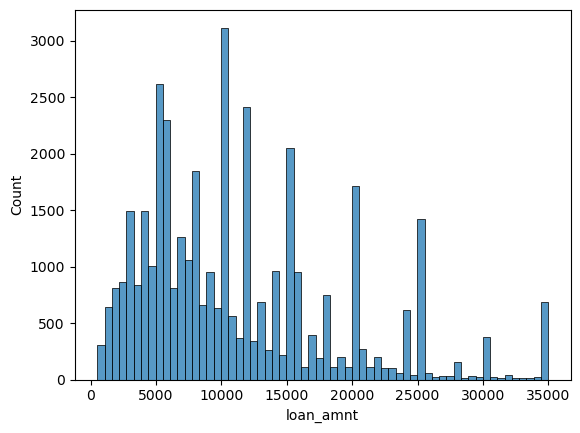

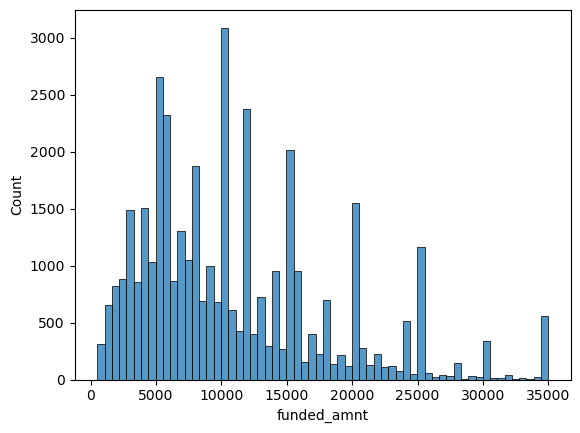

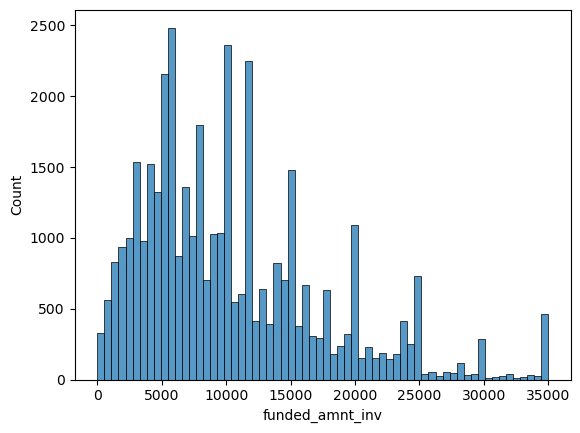

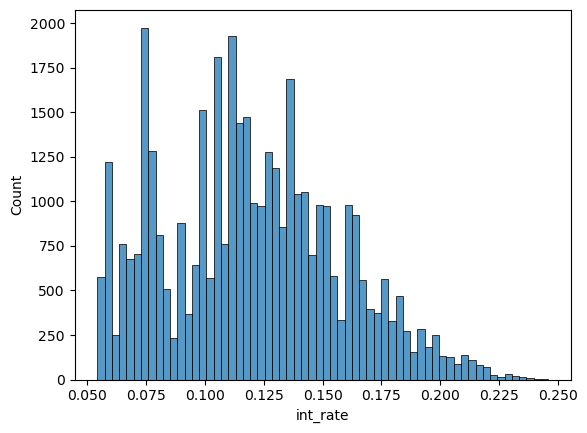

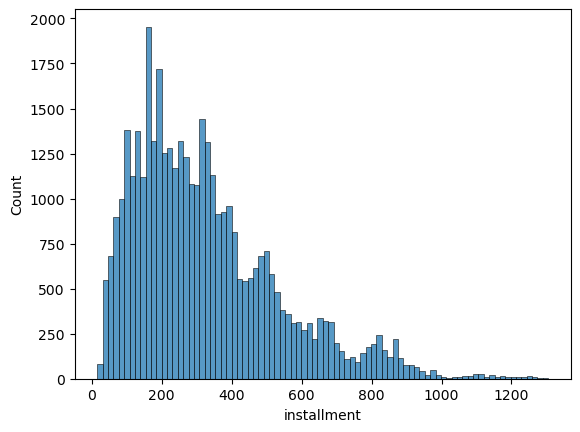

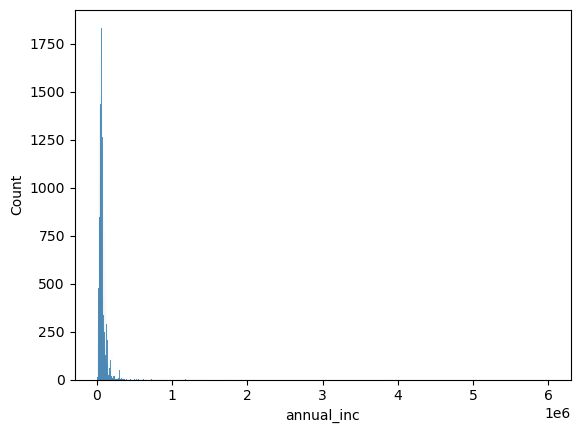

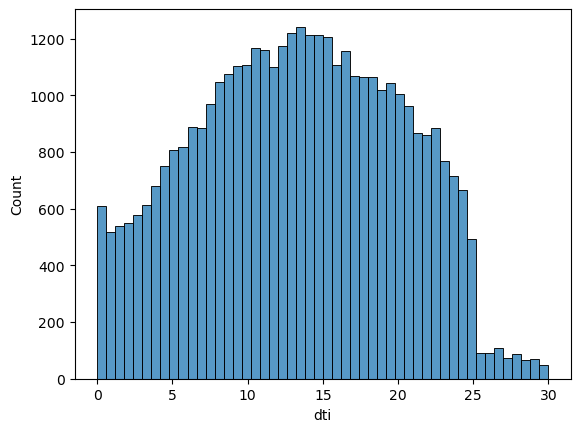

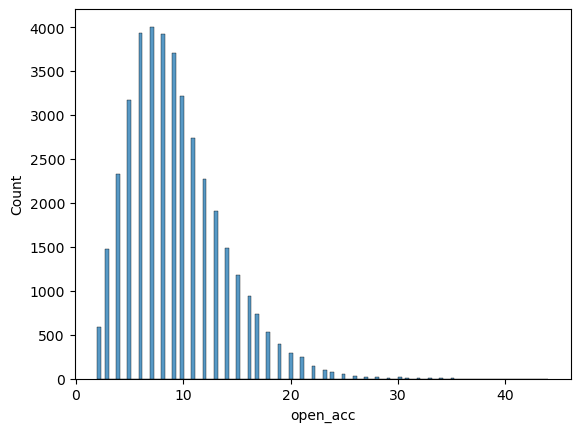

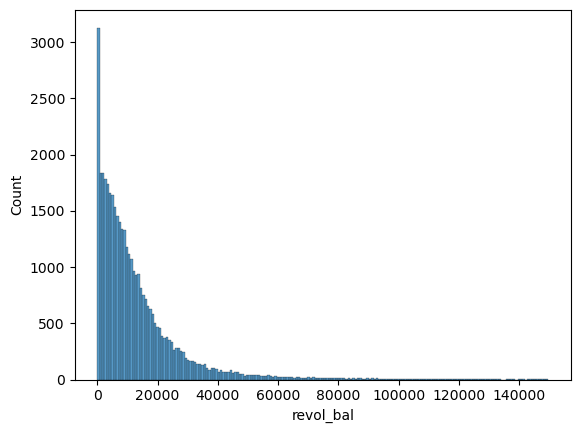

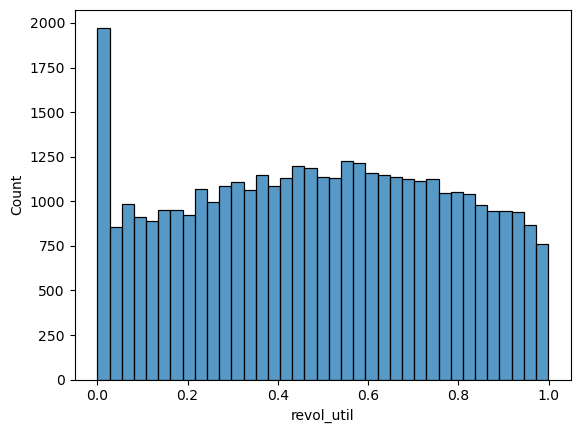

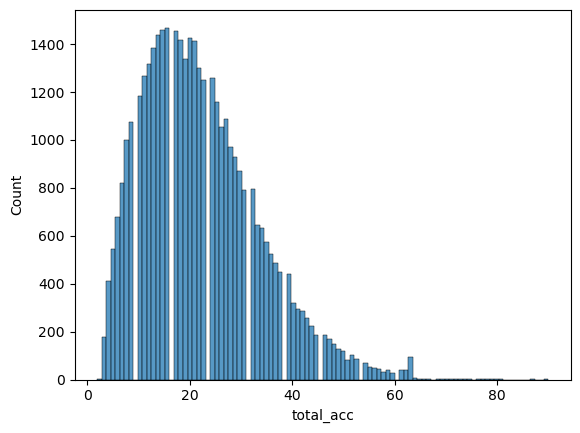

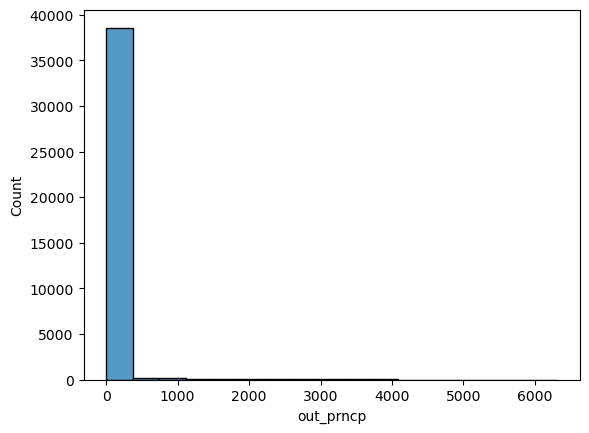

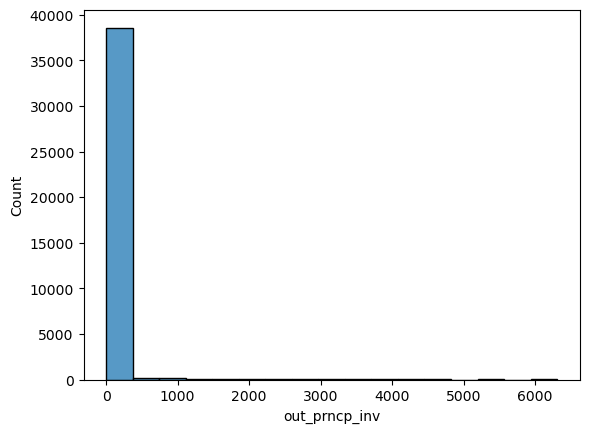

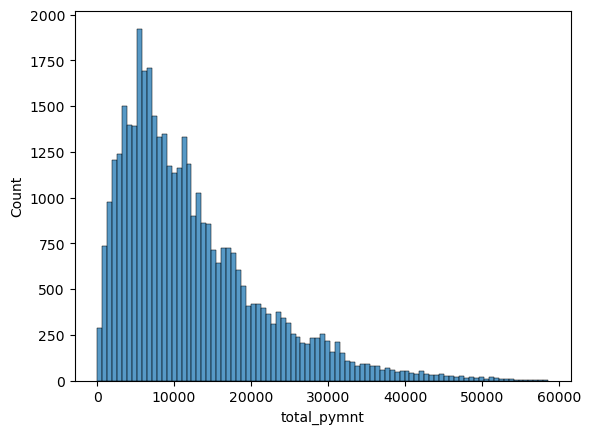

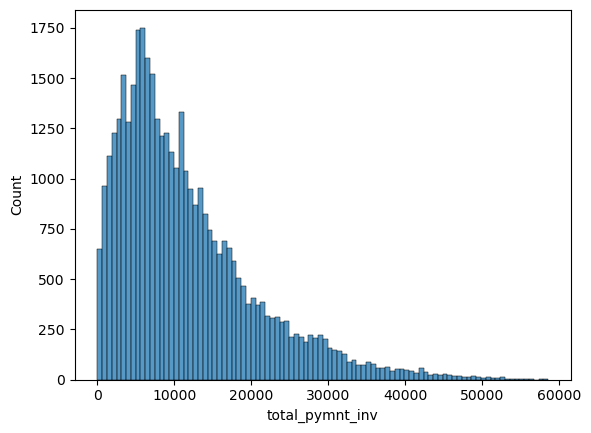

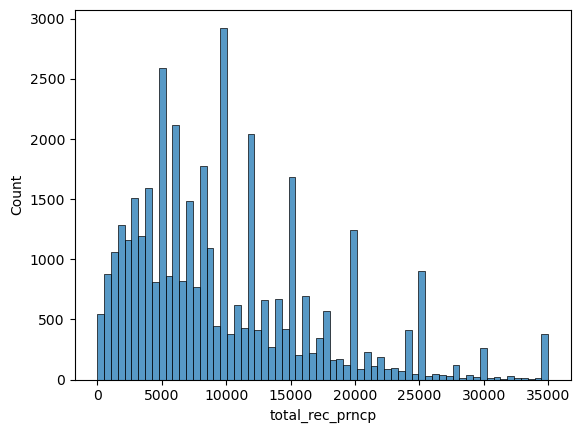

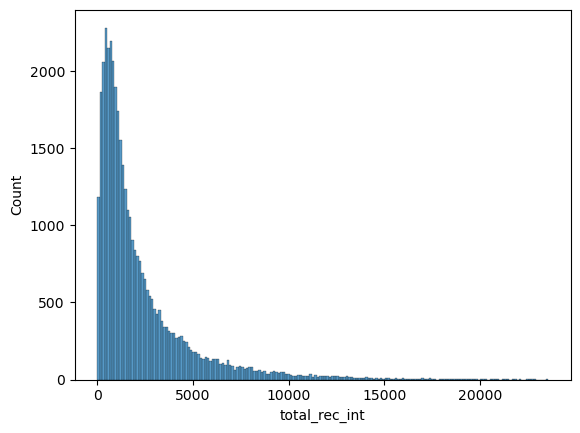

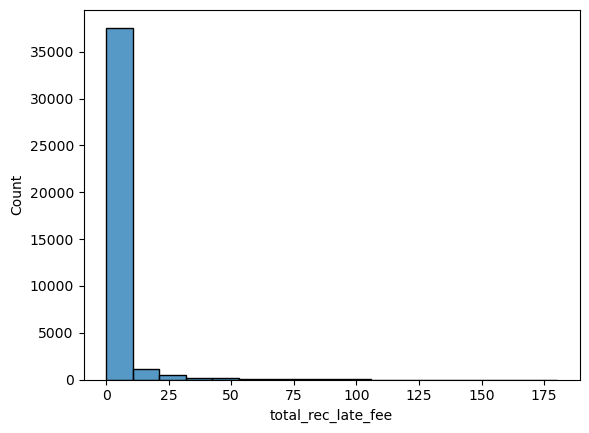

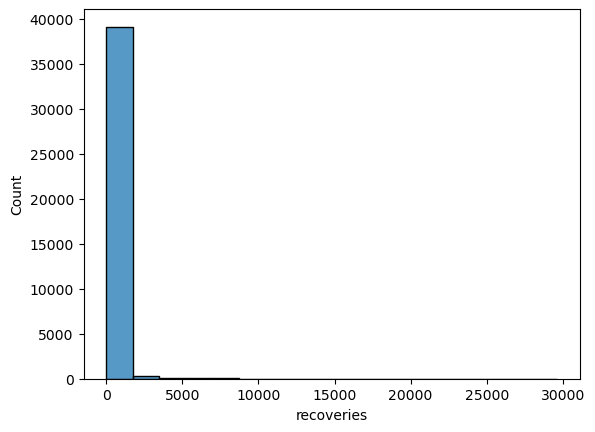

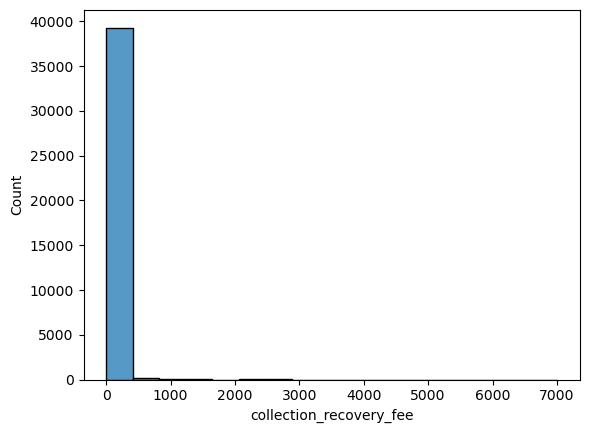

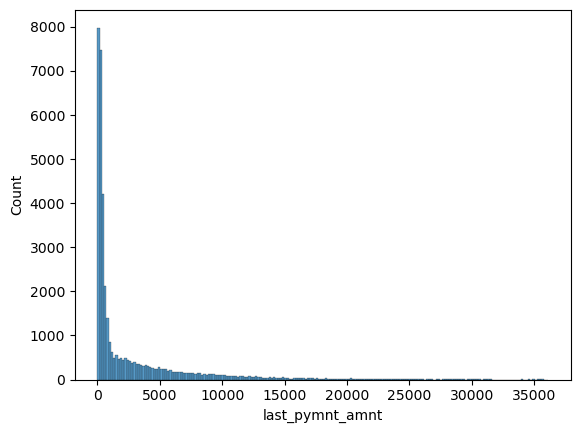

In [225]:
for col in num_cols:
    sns.histplot(x=loandf_cleaned[col])
    plt.show()

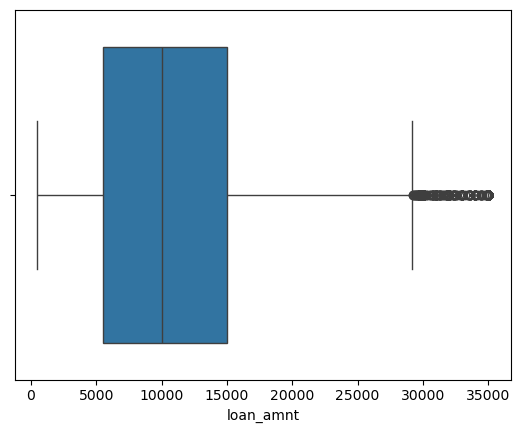

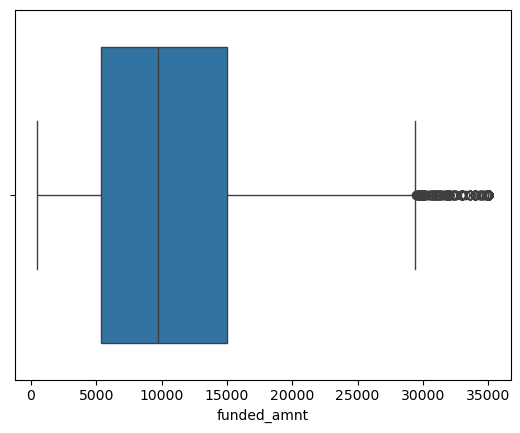

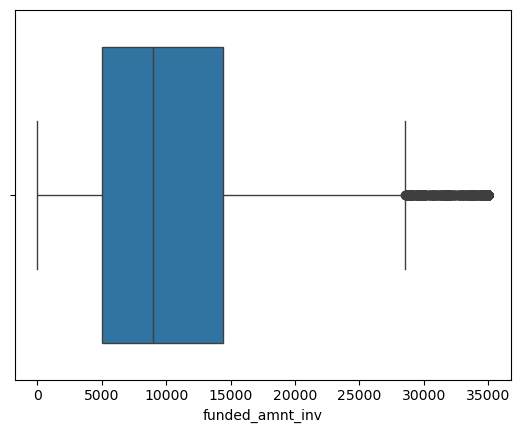

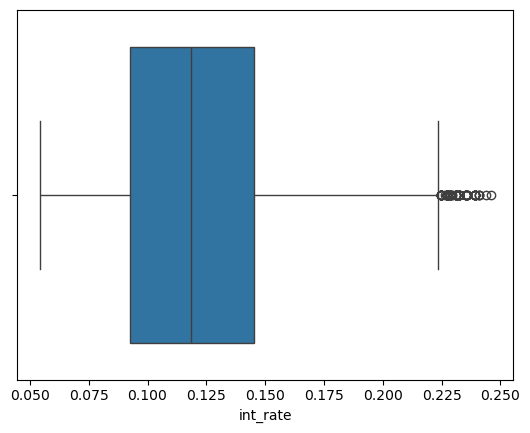

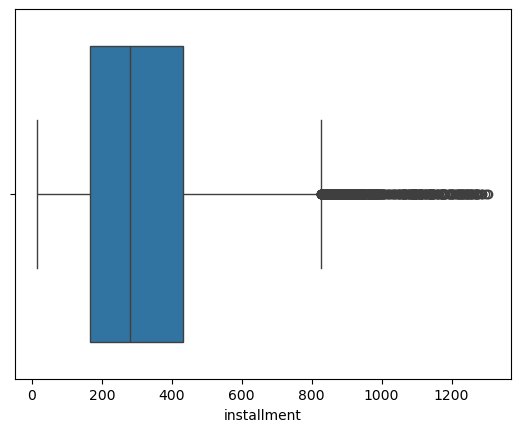

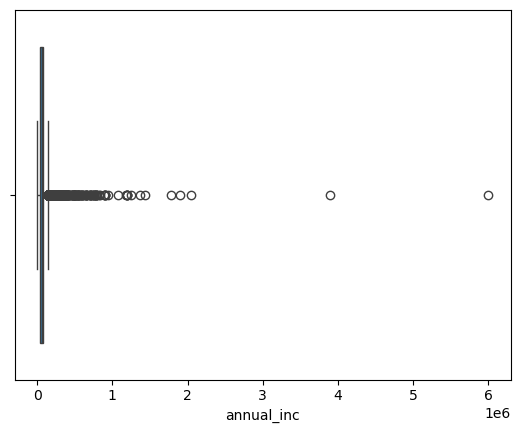

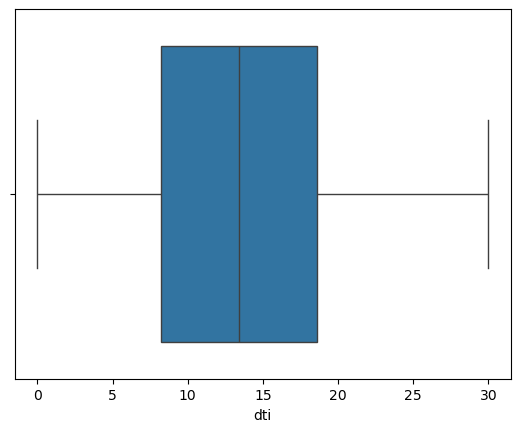

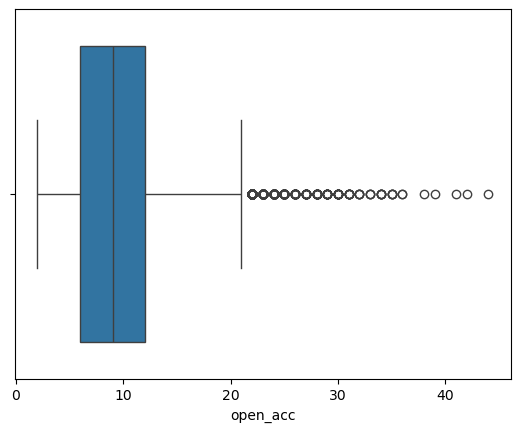

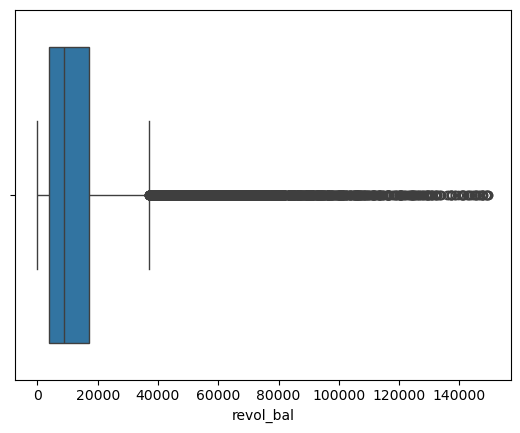

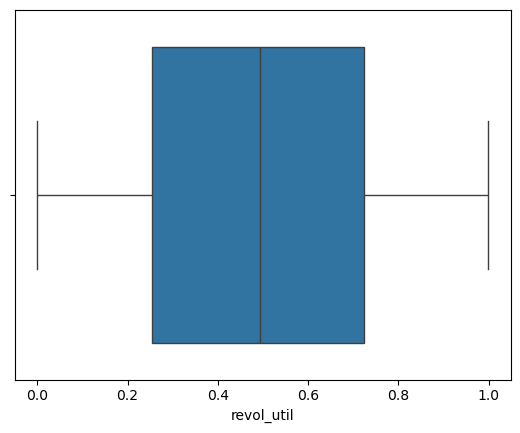

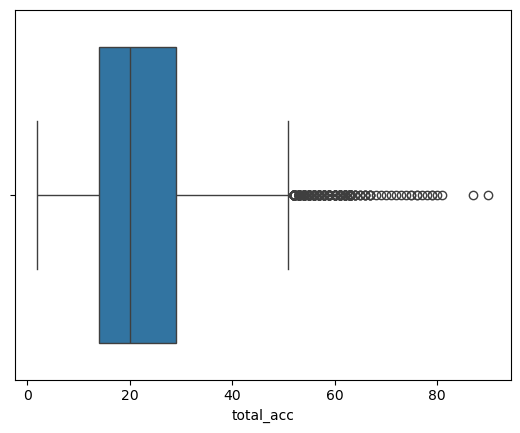

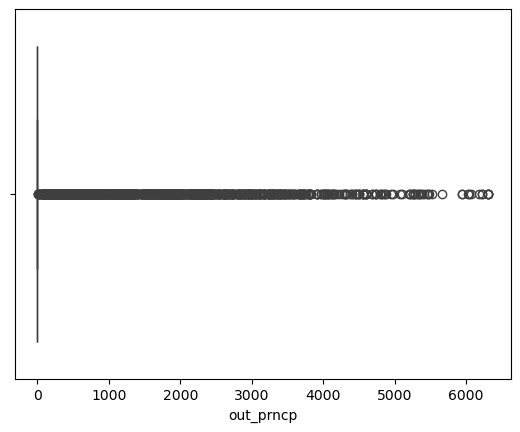

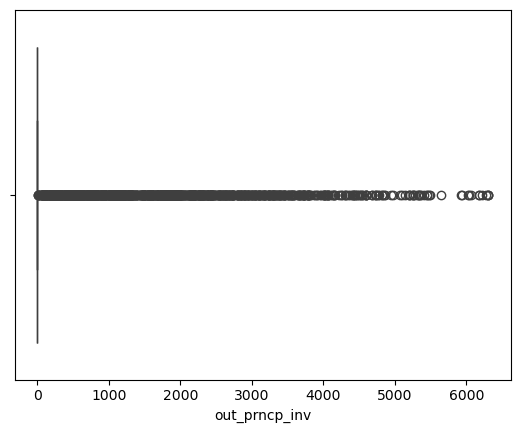

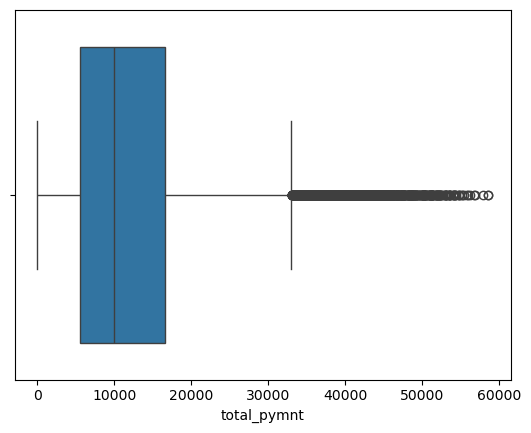

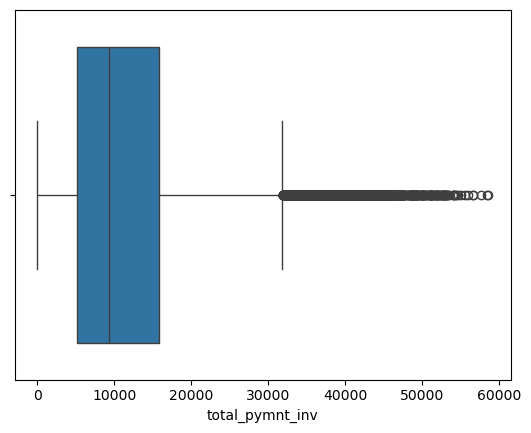

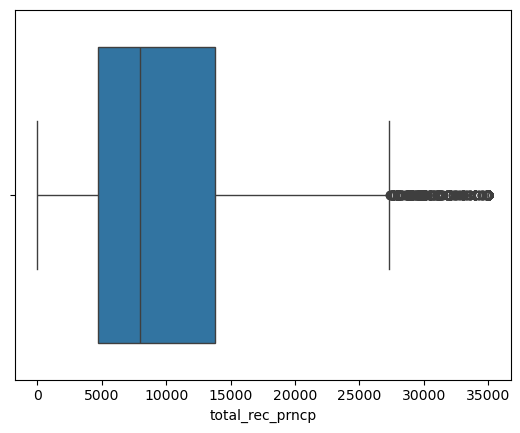

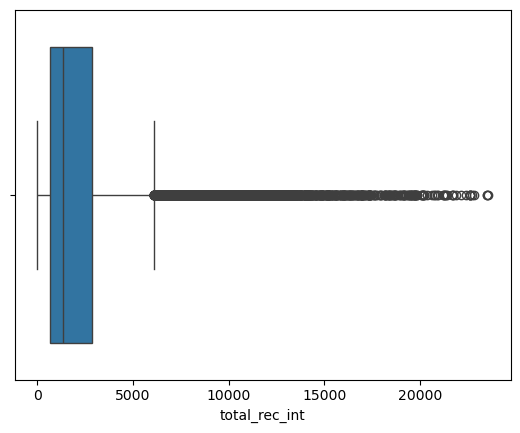

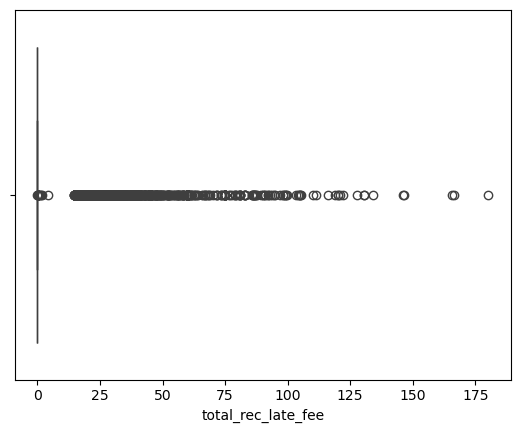

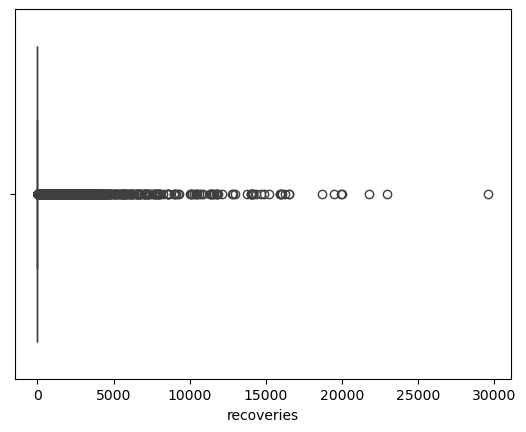

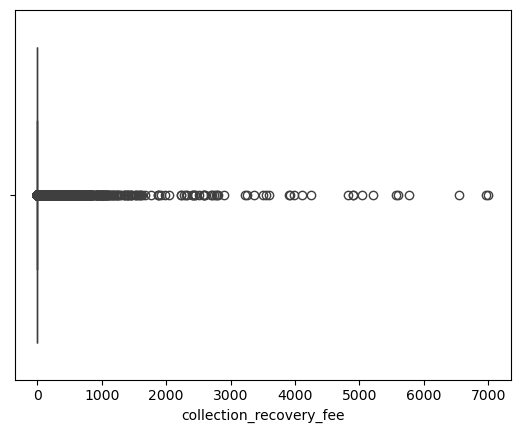

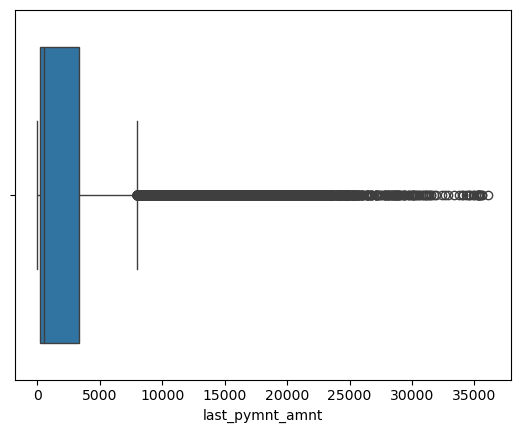

In [227]:
for col in num_cols:
    sns.boxplot(x=loandf_cleaned[col])
    plt.show()

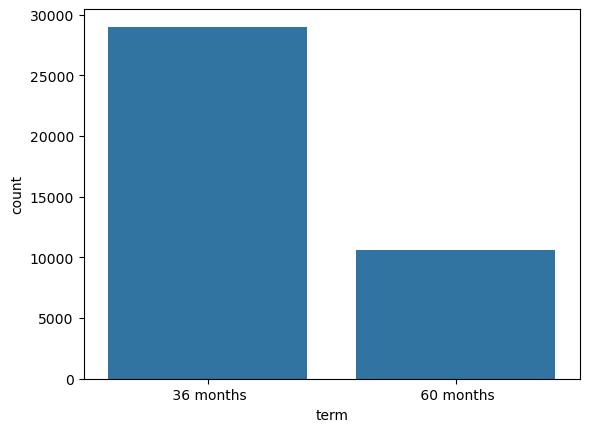

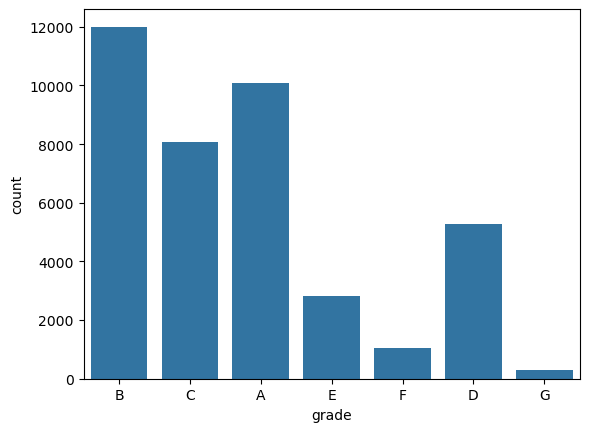

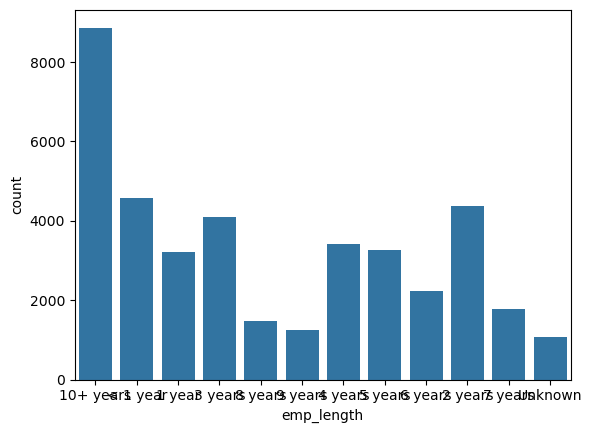

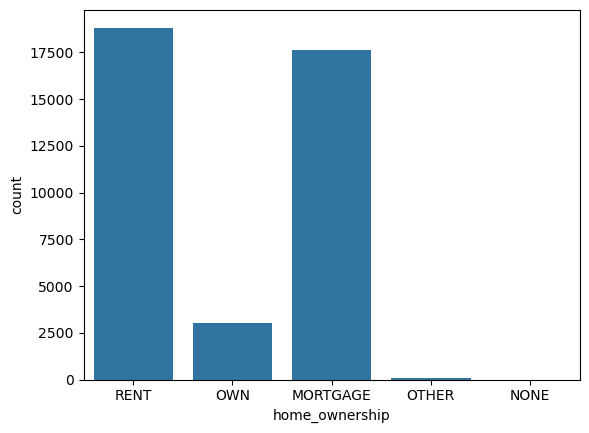

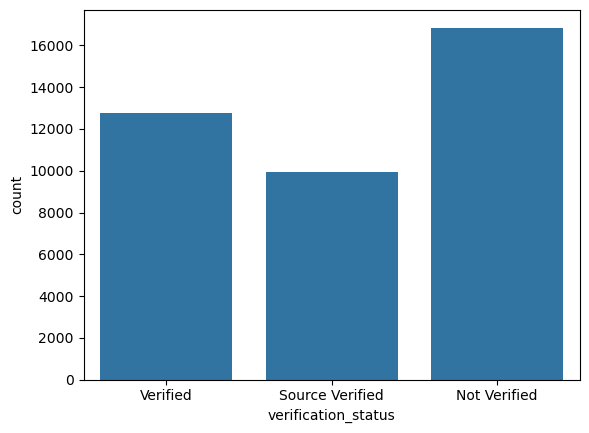

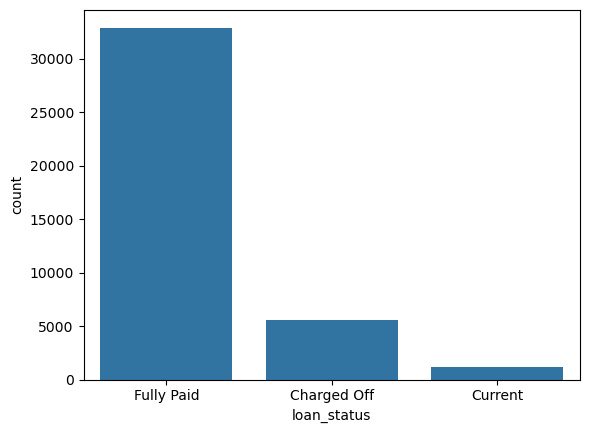

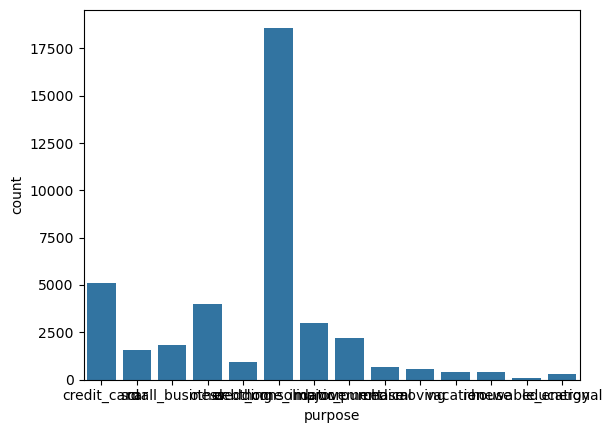

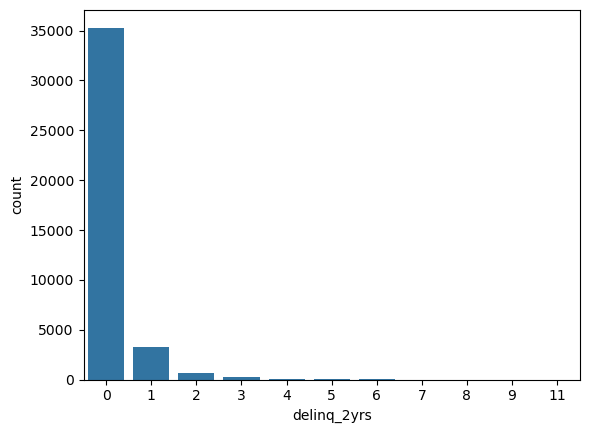

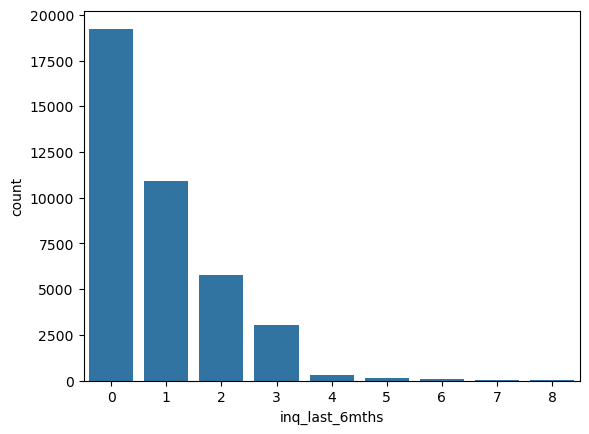

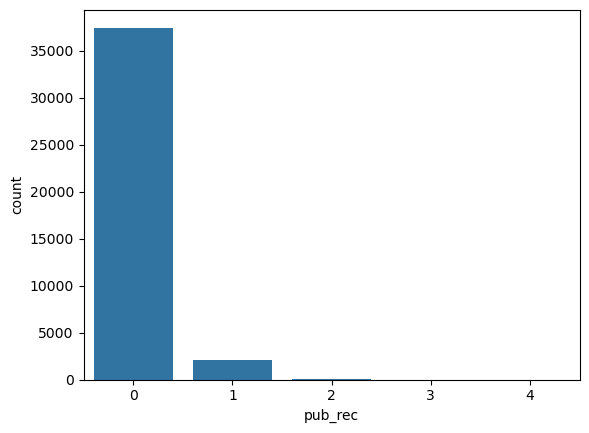

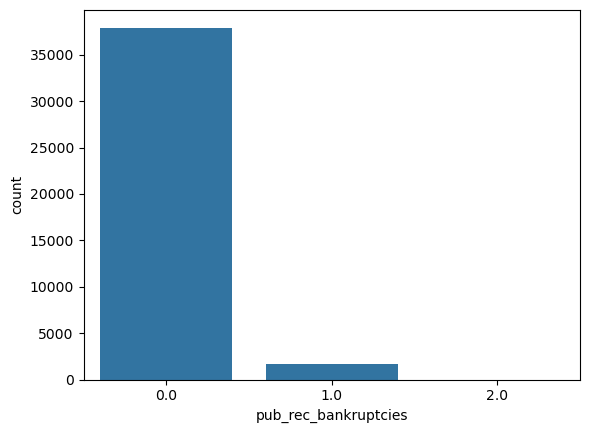

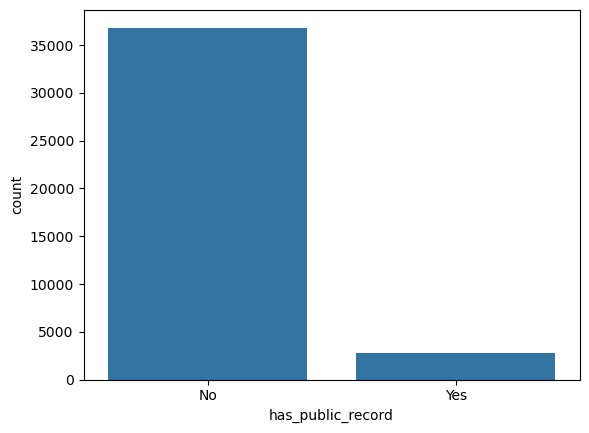

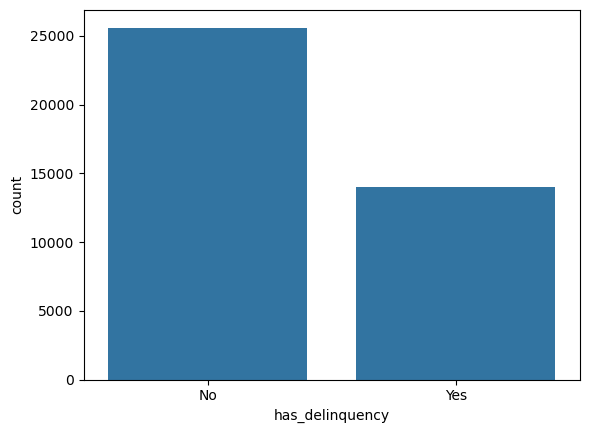

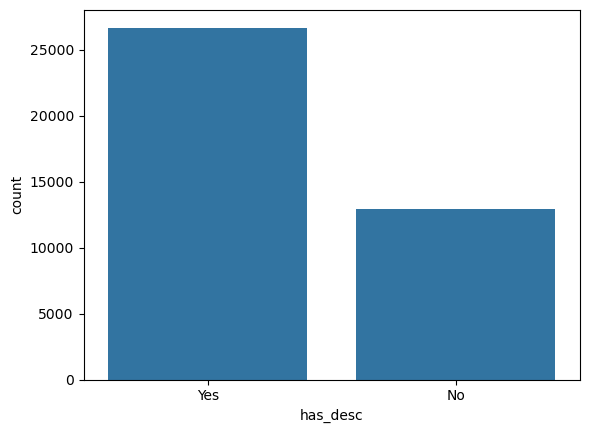

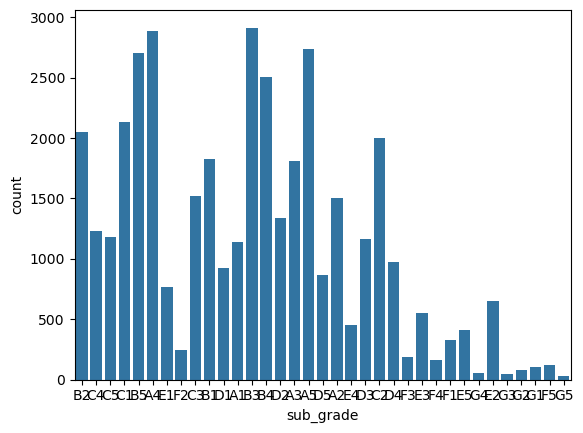

C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


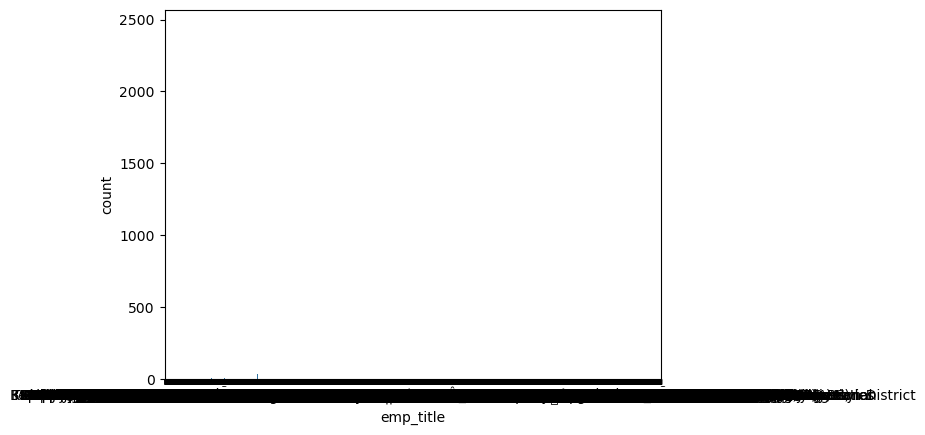

C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\amit.kumar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>

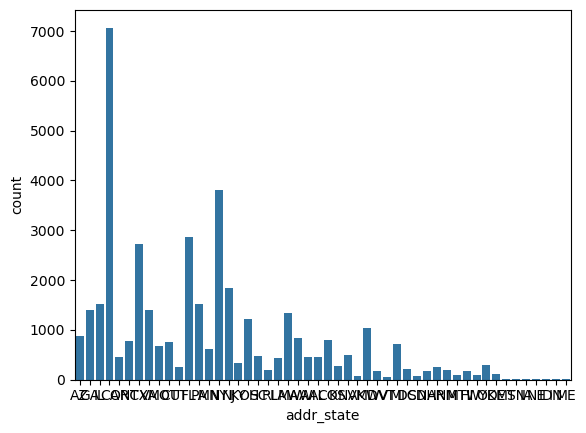

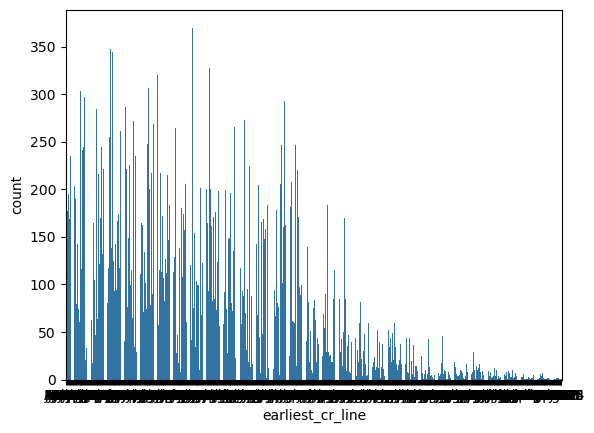

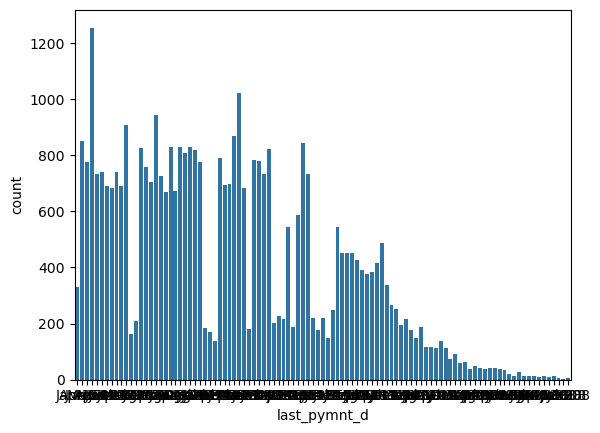

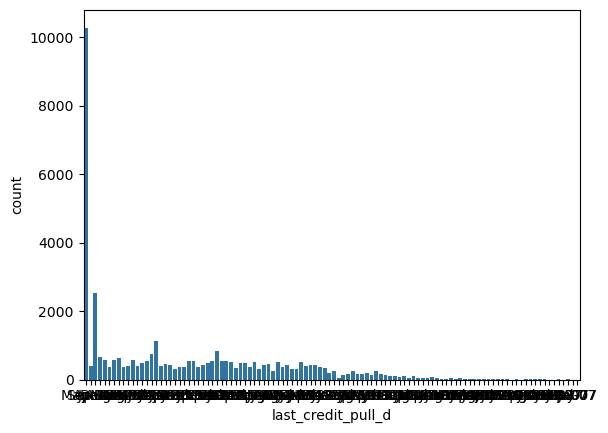

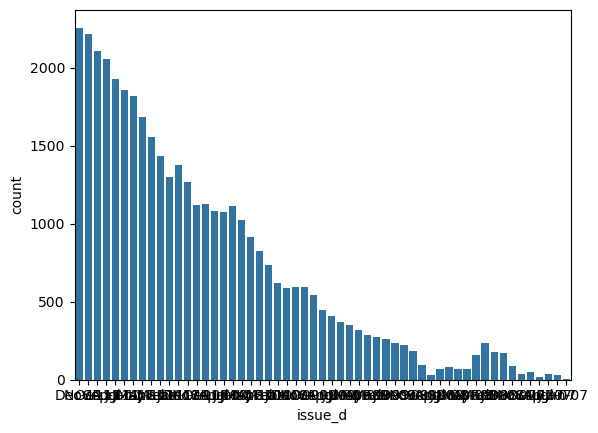

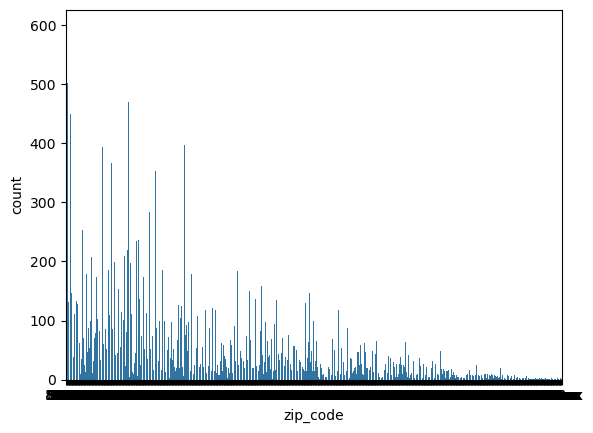

In [229]:
for col in cat_cols:
    sns.countplot(x=loandf_cleaned[col])
    plt.show()